In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

# Adaptive linear Neuron class
<b>Parameters:</b>
    <li>eta :  float (Learning rate (0.0 < L < 0.1))
    <li>n_iter: int (passes over the training dataset)
    <li>random_state: int (Random seed generator for generating random weights)
    
<b>Attributes:</b>
    <li>w_ : 1-d Array (Weights after fitting)
    <li>errors_ : list (Number of missclassifications(updates))
    <li> cost_ : list (costs)
    
<b>Functions:</b>

<code>1. fit()</code>
<br /> Parameters:<br />
    <li>X: (Array-like), shape = [n_samples, n_features] (training vectors)</li>
    <li>y: array-like, shape = [n_samples]</li>
<br /> Returns:<br />
    <li>self object</li>
    
<code>2. net_input() - calculate net input</code>
<br /> Parameters:<br />
    <li> Self
    <li> X: (Array-like), shape = [n_samples, n_features] (training vectors)
<br /> Returns:<br />
    <li>self object
    
<code>3. predict() - predicts the model</code>
<br /> Parameters:<br />
    <li> Self
    <li> X: (Array-like), shape = [n_samples, n_features] (training vectors)
<br /> Returns:<br />
    <li>self object
    
<code>3. activation() - self activation identity function</code>
<br /> Parameters:<br />
    <li> X: (Array-like), shape = [n_samples, n_features] (training vectors)
<br /> Returns:<br />
    <li> X

In [21]:
class AdalineGD(object):
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        # Seed the random to reproduce previous results
        rgen = np.random.RandomState(self.random_state)
        
        # Initialize weights and an empty cost
        self.w_ = rgen.normal(loc=0.0, scale = 0.01, size = 1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta + X.T.dot(errors)
            self.w_[0] += errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    # calculate net input
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    # compute linear activation
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
        
        

## PREPARING DATA SET - IRIS
1. X - First 100 rows of sepal length and petal length
2. y :
    * setosa : 1
    * versicolor: -1

In [22]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
dataset.tail()
X = dataset.iloc[0:100, [0, 2]].values
y = dataset.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

## Finding a good learning rate
**Plotting Cost vs Number of epochs**

*Hyperparameters in the algorithm:*
<ul>
    <li>ETA(learning rate)</li>
    <li>n_iter(Number of epochs)</li>
</ul>

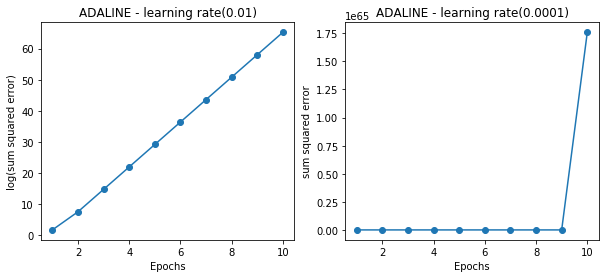

In [23]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

ada1 = AdalineGD(n_iter = 10, eta = 0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(sum squared error)')
ax[0].set_title('ADALINE - learning rate(0.01)')

ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('sum squared error')
ax[1].set_title('ADALINE - learning rate(0.0001)')

plt.show()